<a href="https://colab.research.google.com/github/WanderingGodofChaos/ab-initio-Operating-system/blob/main/A%20Scheme%20For%20Using%20Machine%20Learning%20To%20Characterize%20Titanium%20Dioxide%20Nanotubes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
PCA

'''

'\nPCA\n\n'

In [ ]:
!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import cluster
from google.colab import files

%matplotlib inline

In [ ]:
df = pd.read_csv('Data.csv', header=0)
df.head

<bound method NDFrame.head of           A1        A2        A3  ...     A7169    A7170  Y-length
0   0.001122  0.003845  0.016375  ...  265.4400 -27.2550       438
1   0.000650  0.002162  0.010273  ...  243.4000 -12.8930       840
2   0.004635  0.011048  0.039528  ...   77.4390   9.6401       550
3   0.002518  0.006476  0.023701  ...  109.3400  16.5100       420
4   0.004225  0.009564  0.030081  ...  258.1400 -24.0460       280
5   0.015462  0.020200  0.035004  ...  184.5900  -8.4542       360
6   0.004090  0.010270  0.034971  ...  238.3300 -22.0100       425
7   0.003267  0.009628  0.034946  ...  -87.4800 -23.1560       392
8   0.001365  0.004610  0.020208  ...   65.0560  22.0010       570
9   0.000949  0.003312  0.014823  ...   64.0200  20.8380       540
10  0.015390  0.031215  0.074407  ...   58.3260  21.9420       171
11  0.018088  0.032497  0.069018  ...   60.1670  21.8610       100
12  0.000111  0.000238  0.001468  ...  -28.7330  -5.0435       783
13  0.000046  0.000086  0.000365

In [ ]:
#x1= pd.read_csv('Data.csv',skiprows=0, nrows=20)
x1=df.drop(labels='Y-length',axis=1).values
#y = df['1']
#y= pd.read_csv('Data.csv',usecols=['first'])
#y = df['Y-length'].values
y1 = df.loc[:,['A1']].values

In [ ]:
print(x1)

[[ 1.1220e-03  3.8450e-03  1.6375e-02 ...  2.1447e+02  2.6544e+02
  -2.7255e+01]
 [ 6.5000e-04  2.1620e-03  1.0273e-02 ...  1.9977e+02  2.4340e+02
  -1.2893e+01]
 [ 4.6350e-03  1.1048e-02  3.9528e-02 ...  1.2134e+02  7.7439e+01
   9.6401e+00]
 ...
 [ 5.6000e-05  9.2000e-05  2.5300e-04 ...  9.3129e+01  4.6457e+01
   1.1198e+01]
 [ 2.5460e-03  5.1160e-03  1.3259e-02 ...  1.3927e+02  1.1746e+02
   3.5625e+00]
 [ 2.3500e-03  6.0940e-03  2.3318e-02 ...  9.6485e+01  6.1222e+01
   2.1037e+01]]


In [ ]:
print (x1.shape, y1.shape)

(18, 7170) (18, 1)


In [ ]:
class convers_pca():
    def __init__(self, no_of_components):
        self.no_of_components = no_of_components
        self.eigen_values = None
        self.eigen_vectors = None

    def transform(self, x):
        return np.dot(x - self.mean, self.projection_matrix.T)

    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean

    def fit(self, x):
        self.no_of_components = x.shape[1] if self.no_of_components is None else self.no_of_components
        self.mean = np.mean(x, axis=0)

        cov_matrix = np.cov(x - self.mean, rowvar=False)

        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        self.eigen_vectors = self.eigen_vectors.T

        self.sorted_components = np.argsort(self.eigen_values)[::-1]

        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]

        self.explained_variance = self.eigen_values[self.sorted_components]
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()


In [ ]:
std = StandardScaler()
transformed = StandardScaler().fit_transform(x1)

In [ ]:
pca = convers_pca(no_of_components=100)
pca.fit(transformed)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


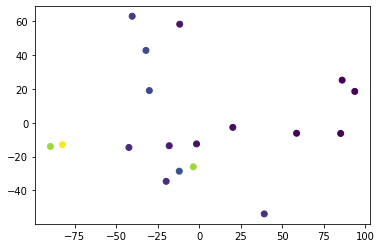

In [ ]:
x1_std = pca.transform(transformed)

plt.figure()
plt.scatter(x1_std[:, 0], x1_std[:,1], c=y1)

In [ ]:
pca = PCA(n_components=10)
pca.fit(x1)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)

[0.27950444 0.12949298 0.10521513 0.1024271  0.07607249 0.06530904
 0.04531561 0.04035674 0.03649928 0.03046815]


0.9106609483437581

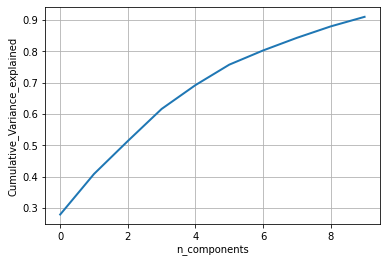

In [ ]:

pca_data=pca.fit_transform(x1)
percentage_var_explained = pca.explained_variance_ratio_;
cum_var_explained=np.cumsum(percentage_var_explained)
#plot PCA spectrum
plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_Variance_explained')
plt.show()